# Validation programming exercise

In [1]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")

In [3]:
def preprocess_features(california_housing_dataframe):
    """
    Prepares input features from California housing data set
    
    Args:
        california_housing_dataframe : Pandas DataFrame containing CA housing data
    Returns:
        Pandas DataFrame containing features used for the model, including synthetic feature
    """
    
    selected_features = california_housing_dataframe[
        ['latitude',
         'longitude',
         'housing_median_age',
         'total_rooms',
         'total_bedrooms',
         'population',
         'households',
         'median_income']]
    processed_features = selected_features.copy()
    
    #synthetic feature
    processed_features['rooms_per_person'] = california_housing_dataframe['total_rooms'] / california_housing_dataframe['population']
    
    return processed_features

In [8]:
def preprocess_targets(california_housing_dataframe):
    """
    Prepare target features (i.e. labels) from CA housing dataset
    
    Args:
        california_housing_dataframe : Pandas DataFrame containing CA housing data
    Returns:
        Pandas DataFrame containing features to be used for the model, including synthetic feature
    """
    output_targets = pd.DataFrame()
    output_targets['median_house_value'] = california_housing_dataframe['median_house_value'] / 1000.0
    return output_targets

##### split data sets ( training / validation ), 12,000 | 5,000

In [44]:
shuffled_data = california_housing_dataframe.iloc[np.random.permutation(len(california_housing_dataframe))]

In [45]:
training_examples = preprocess_features(shuffled_data).head(12000)
training_examples.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.6,28.6,2643.5,538.6,1430.4,500.3,3.9,2.0
std,2.1,2.0,12.6,2208.1,420.9,1163.1,382.9,1.9,1.1
min,32.5,-124.3,1.0,11.0,3.0,3.0,3.0,0.5,0.0
25%,33.9,-121.8,18.0,1463.0,298.0,794.0,283.0,2.6,1.5
50%,34.2,-118.5,29.0,2123.0,433.0,1166.0,408.0,3.6,1.9
75%,37.7,-118.0,37.0,3140.2,647.2,1722.0,603.0,4.7,2.3
max,42.0,-114.3,52.0,37937.0,6445.0,35682.0,6082.0,15.0,55.2


In [46]:
training_targets = preprocess_targets(shuffled_data).head(12000)
training_targets.describe()

,median_house_value
count,12000.0
mean,207.3
std,116.2
min,15.0
25%,119.2
50%,179.9
75%,264.8
max,500.0


In [47]:
validation_examples = shuffled_data.tail(5000)
validation_examples.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,-119.5,35.6,28.6,2644.1,541.4,1427.7,503.3,3.9,207196.3
std,2.0,2.1,12.5,2111.2,422.9,1110.4,388.3,1.9,115552.9
min,-124.2,32.5,2.0,2.0,1.0,6.0,1.0,0.5,14999.0
25%,-121.7,33.9,18.0,1456.8,294.0,779.0,277.0,2.6,120700.0
50%,-118.5,34.2,29.0,2142.0,437.0,1169.0,414.0,3.5,181000.0
75%,-118.0,37.7,37.0,3182.5,652.0,1716.5,608.2,4.8,265425.0
max,-114.5,41.8,52.0,30405.0,4492.0,12873.0,4372.0,15.0,500001.0


In [48]:
validation_targets = shuffled_data.tail(5000)
validation_targets.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,-119.5,35.6,28.6,2644.1,541.4,1427.7,503.3,3.9,207196.3
std,2.0,2.1,12.5,2111.2,422.9,1110.4,388.3,1.9,115552.9
min,-124.2,32.5,2.0,2.0,1.0,6.0,1.0,0.5,14999.0
25%,-121.7,33.9,18.0,1456.8,294.0,779.0,277.0,2.6,120700.0
50%,-118.5,34.2,29.0,2142.0,437.0,1169.0,414.0,3.5,181000.0
75%,-118.0,37.7,37.0,3182.5,652.0,1716.5,608.2,4.8,265425.0
max,-114.5,41.8,52.0,30405.0,4492.0,12873.0,4372.0,15.0,500001.0


## Task 1 : Examine data


- 'median income' scale not really known
- very high 'rooms_per_person' values
- max 'median_house_value' looks potentially artificial

## Task 2 : Plot Lat/Lng vs Median House Value

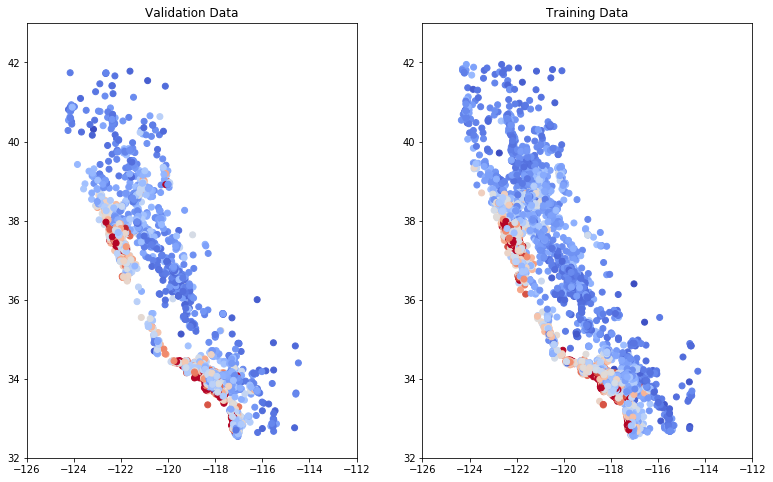

In [49]:
plt.figure(figsize=(13,8))

ax = plt.subplot(1, 2, 1)
ax.set_title("Validation Data")

ax.set_autoscaley_on(False)
ax.set_ylim([32, 43])
ax.set_autoscalex_on(False)
ax.set_xlim([-126, -112])
plt.scatter(validation_examples['longitude'], validation_examples['latitude'], cmap="coolwarm",
           c=validation_targets['median_house_value'] / validation_targets['median_house_value'].max())

ax = plt.subplot(1, 2, 2)
ax.set_title("Training Data")

ax.set_autoscaley_on(False)
ax.set_ylim([32, 43])
ax.set_autoscalex_on(False)
ax.set_xlim([-126, -112])
plt.scatter(training_examples['longitude'], training_examples['latitude'], cmap="coolwarm",
           c=training_targets['median_house_value'] / training_targets['median_house_value'].max())

## Task 3: Return to Data Importing and Pre-Processing code and find bugs

- data isn't randomized

Shuffled data before passing into extraction helper methods